In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from sklearn.datasets import load_diabetes
data=load_diabetes()


In [ ]:
X=pd.DataFrame(data.data,columns=data.feature_names)


In [ ]:
y=data.target


In [ ]:
X.shape,y.shape


((442, 10), (442,))

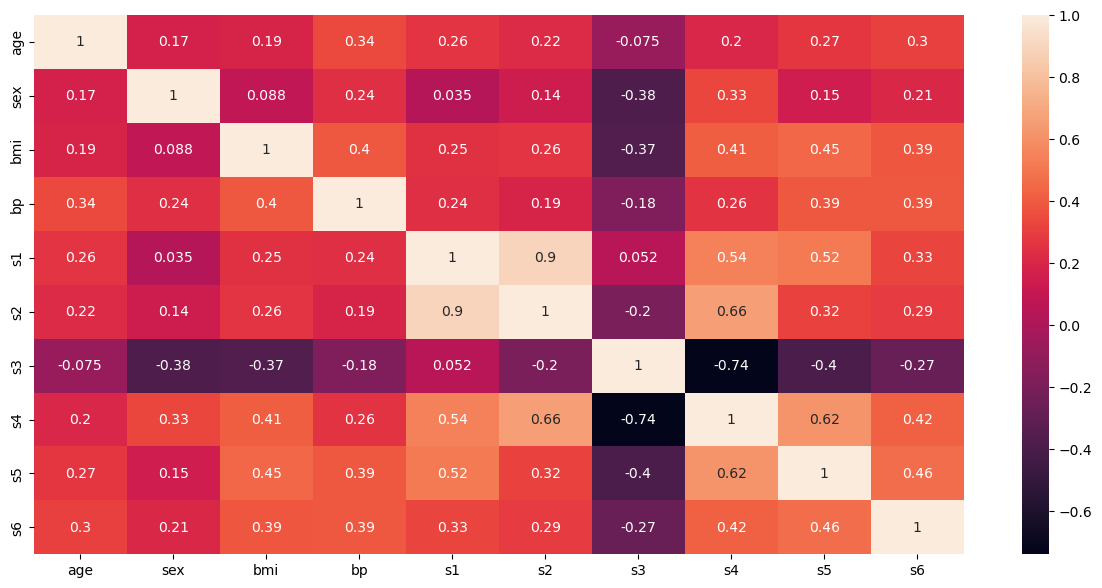

In [ ]:
correlation=X.corr()
plt.figure(figsize=(15,7))
sns.heatmap(correlation,annot=True)
plt.show()


In [ ]:
X.corr()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)


In [ ]:
# Model Training
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)


DecisionTreeRegressor()

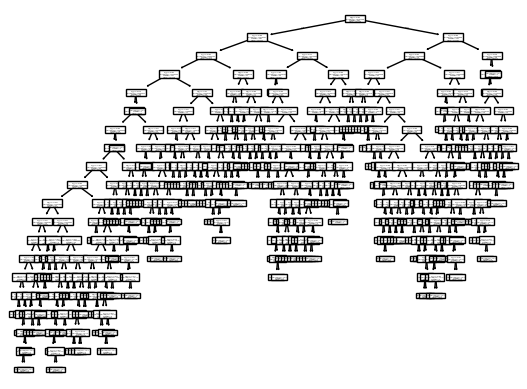

In [ ]:
from sklearn.tree import plot_tree
plot_tree(regressor)
plt.show()


In [ ]:
# Prediction
y_pred=regressor.predict(X_test)


In [ ]:
# metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean squared error :",mean_squared_error(y_test,y_pred))
print("Mean absolute error :",mean_absolute_error(y_test,y_pred))
r2_score(y_test,y_pred)


Mean squared error : 7231.631578947368
Mean absolute error : 66.93984962406014


-0.14285832344011196

In [ ]:
## Hyper Paramater Tuning to improve the score

params={
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':[4,5,10,20,30,40,50,60,2000],
    'splitter':['best','random'],
    'max_features':['auto','sqrt', 'log2']
                 
              
}


In [ ]:
from sklearn.model_selection import GridSearchCV
regressor2=DecisionTreeRegressor()
grid=GridSearchCV(regressor2,param_grid=params)


In [59]:
grid


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [4, 5, 10, 20, 30, 40, 50, 60, 2000],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [ ]:
# Fit and prediction
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)
grid_pred=grid.predict(X_test)


In [ ]:
# metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean squared error :",mean_squared_error(y_test,grid_pred))
print("Mean absolute error :",mean_absolute_error(y_test,grid_pred))
r2_score(y_test,grid_pred)


Mean squared error : 4334.712548974326
Mean absolute error : 52.59038982377123


0.31495925058772045

In [ ]:
grid.best_params_


{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [ ]:
model=DecisionTreeRegressor(criterion='squared_error',max_depth= 3,max_features= 'sqrt', splitter= 'random')
model.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=3, max_features='sqrt', splitter='random')

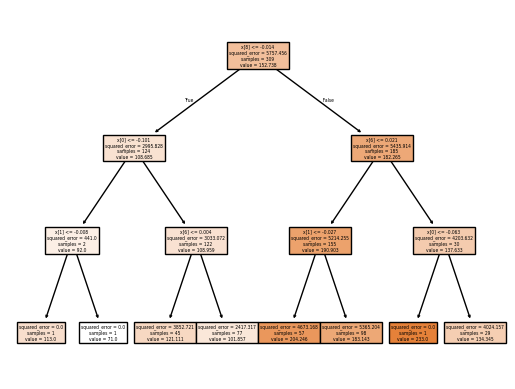

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model,filled=True)
plt.show()


In [ ]:
model_pred=model.predict(X_test)


In [ ]:
# metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean squared error :",mean_squared_error(y_test,model_pred))
print("Mean absolute error :",mean_absolute_error(y_test,model_pred))
r2_score(y_test,model_pred)


Mean squared error : 4775.958033825748
Mean absolute error : 56.567007788246


0.24522656723160563